# Exercice 1

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import MultiIndex
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import seaborn as sns
sns.set_theme()


1. Affichons les 10 premières lignes du fichier.

In [65]:
df = pd.read_excel('./data/employes_dataset.xlsx')
df.head(10)

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note)
0,1,Richard,Stacey,62,Homme,lgonzalez@crawford.org,Trinidad and Tobago,New Devinview,54564.0,2023-09-30,Finance,0.0,2.0
1,2,Chang,Loretta,65,Homme,rebeccabrown@hotmail.com,Netherlands,Lake Rebecca,23393.0,2023-10-14,Informatique,0.0,2.0
2,3,Fisher,Kimberly,18,Homme,waynebarnes@schultz-sims.org,Oman,Alexanderfort,62711.0,2017-08-24,Finance,60.0,1.0
3,4,Green,Julie,21,Homme,morgandevon@burgess.com,Moldova,Alexanderville,52274.0,2022-06-09,RH,100.0,1.0
4,5,Dixon,Jacob,21,Homme,elliskaren@gmail.com,Dominican Republic,East Darren,108305.0,2018-08-02,Informatique,0.0,3.0
5,6,Sullivan,Ana,57,Femme,afranklin@hotmail.com,Iceland,South Benjamin,33920.0,2019-05-26,RH,20.0,4.0
6,7,Bowers,Rodney,27,Femme,rmiranda@hess.com,Congo,Dawsonland,98086.0,2016-09-28,RH,20.0,4.0
7,8,Turner,Stephanie,37,Homme,uphillips@cohen.com,Palau,West Tiffany,25213.0,2024-06-07,Logistique,NaN,4.0
8,9,Woods,Glenn,39,Homme,reidwilliam@hotmail.com,Slovakia (Slovak Republic),New Jessica,51914.0,2025-03-06,Production,40.0,1.0
9,10,Silva,Geoffrey,68,Homme,williamsalexis@beasley.biz,Hungary,Lake Rebecca,119041.0,2024-12-27,Finance,80.0,5.0


2. Afficher les noms de colonnes du fichier.

In [66]:
print(df.columns)

Index(['ID', 'Nom', 'Prénom', 'Âge', 'Sexe', 'Email', 'Pays', 'Ville',
       'Salaire (€)', 'Date d'embauche', 'Département', 'Télétravail (%)',
       'Performance (Note)'],
      dtype='object')


3. Compter le nombre d’hommes et de femmes.

In [67]:
# nbre_hommes = df.Sexe.lower()
nbre_hommes = df.query('Sexe == "Homme"').count()['Sexe']
nbre_femmes = df.query('Sexe == "Femme"').count()['Sexe']



print(f"Nombre d'homme: {nbre_hommes}, Nombre de femme: {nbre_femmes}")

Nombre d'homme: 487, Nombre de femme: 513


4. Identifier les 5 pays les plus représentés.

In [68]:
df.groupby('Pays').size().nlargest(5)

Pays
Congo          10
Finland        10
Madagascar     10
New Zealand    10
Tajikistan     10
dtype: int64

5. Calculer le salaire moyen, médian, minimum, maximum et l’écart-type à l’aide de NumPy.

In [69]:
# print(type(df.describe()))

print(f"Salaire Moyen: {np.nanmean(df['Salaire (€)']):.4f} €")
print(f"Salaire Médian: {np.nanmedian(df['Salaire (€)']):.4f} €")
print(f"Salaire Minimum: {np.nanmin(df['Salaire (€)']):.4f} €")
print(f"Salaire Maximum: {np.nanmax(df['Salaire (€)']):.4f} €")
print(f"Écart-type: {np.nanstd(df['Salaire (€)']):.4f} €")

Salaire Moyen: 69101.7420 €
Salaire Médian: 69518.5000 €
Salaire Minimum: 18107.0000 €
Salaire Maximum: 119836.0000 €
Écart-type: 29703.0342 €


6. Donner l’âge moyen par département.

In [70]:
df.groupby("Département")["Âge"].mean()

Département
Finance         42.560694
Informatique    43.681529
Logistique      41.757764
Marketing       43.187500
Production      44.198795
RH              44.131148
Name: Âge, dtype: float64

7. Trouver la ville ayant le plus grand nombre d’employés.

In [71]:
df.groupby("Ville").size().nlargest(1, keep="all")

Ville
Brittanyview        2
Douglasport         2
East Angela         2
East Cynthia        2
East Jessica        2
East Mark           2
East Michael        2
East Nicole         2
Jamesville          2
Jennifertown        2
Jenniferview        2
Johnsonburgh        2
Johnsonmouth        2
Kellyview           2
Lake Alicia         2
Lake Daniel         2
Lake Rebecca        2
Martinmouth         2
Michaelburgh        2
New Devinview       2
New Jessica         2
North Kathy         2
North Lisa          2
North Nicole        2
Robertborough       2
Smithmouth          2
South Danielside    2
South Elizabeth     2
South Emily         2
South Michael       2
South Ryan          2
Stephaniestad       2
West Matthew        2
West William        2
Williamsberg        2
dtype: int64

8. Lister les 10 employés les mieux payés.

In [72]:
df.nlargest(n=10, columns="Salaire (€)")

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note)
189,190,Allen,Anna,40,Homme,hoffmanandrew@hubbard.com,Tokelau,East Adam,119836.0,2022-12-13,Informatique,100.0,5.0
817,818,Mitchell,Monica,68,Homme,terri97@ramirez-mcdaniel.com,Lebanon,Blanchardtown,119834.0,2023-05-02,Production,40.0,4.0
539,540,Fischer,Jesus,39,Femme,destiny81@hotmail.com,Saint Lucia,New Frankport,119810.0,2024-12-13,Logistique,80.0,4.0
714,715,Spears,Joshua,23,Femme,megan57@orozco.info,United States Virgin Islands,Mccarthyhaven,119790.0,2019-07-19,Informatique,20.0,4.0
384,385,Berry,Deborah,53,Homme,patricklopez@hotmail.com,Congo,Rachaelland,119664.0,2024-08-28,RH,0.0,5.0
129,130,Clark,James,68,Homme,taylornathan@dixon-miller.net,Kyrgyz Republic,Michelleberg,119643.0,2016-10-26,Marketing,60.0,4.0
81,82,Leblanc,Nicole,32,Femme,jenniferbaldwin@hotmail.com,Hungary,Scottside,119637.0,2020-06-15,Finance,0.0,NaN
178,179,Howard,Brett,26,Femme,melissayoder@barrera-schmidt.com,Qatar,North Jessicahaven,119515.0,2016-02-02,Finance,20.0,3.0
487,488,Garcia,Nicole,28,Femme,zrose@yahoo.com,Burundi,North Jamie,119376.0,2021-05-05,Production,40.0,3.0
141,142,Williams,Darlene,35,Homme,sara81@gmail.com,Cuba,Brittanyview,119272.0,2019-09-21,Production,100.0,2.0


9. Calculer le nombre d’employés par département et par sexe.

In [73]:
df.groupby(["Département","Sexe"]).size()

Département   Sexe 
Finance       Femme    91
              Homme    82
Informatique  Femme    81
              Homme    76
Logistique    Femme    89
              Homme    72
Marketing     Femme    74
              Homme    86
Production    Femme    88
              Homme    78
RH            Femme    90
              Homme    93
dtype: int64

11. Identifier les colonnes contenant des valeurs manquantes.

In [74]:
df.isnull().sum()

ID                     0
Nom                    0
Prénom                 0
Âge                    0
Sexe                   0
Email                  0
Pays                   0
Ville                  0
Salaire (€)            4
Date d'embauche        0
Département            0
Télétravail (%)       54
Performance (Note)    48
dtype: int64

12. Remplacer les NaN de la colonne ‘Télétravail (%)’ par la moyenne de cette colonne.

In [75]:
print(df.describe()["Télétravail (%)"]["mean"])

42.98097251585624


In [76]:
teletravail_mean = df['Télétravail (%)'].mean()
df['Télétravail (%) (1)'] = df['Télétravail (%)'].fillna(teletravail_mean)

13. Remplacer les NaN de la colonne ‘Télétravail (%)’ par une valeur estimée pertinente (par
exemple, la moyenne par département ou selon l’âge).

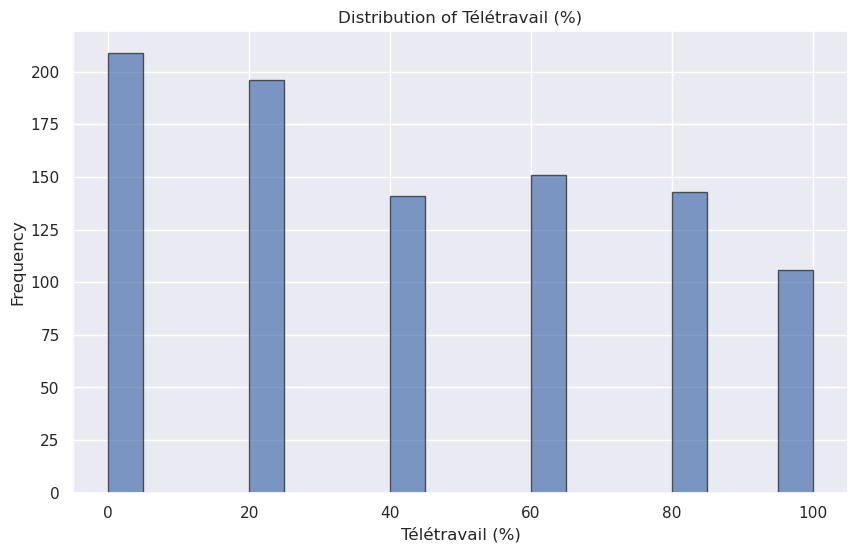

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(df['Télétravail (%)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Télétravail (%)')
plt.xlabel('Télétravail (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [78]:
teletravail_by_dept_country = df.groupby(['Département', 'Pays'])['Télétravail (%)'].transform('mean')
df['Télétravail (%) (2)'] = df['Télétravail (%)'].fillna(teletravail_by_dept_country)
print(df.describe()['Télétravail (%) (2)'])

count    978.000000
mean      42.937969
min        0.000000
25%       20.000000
50%       40.000000
75%       80.000000
max      100.000000
std       33.711981
Name: Télétravail (%) (2), dtype: float64


In [79]:
teletravail_by_dept = df.groupby('Département')['Télétravail (%)'].transform('mean')
df['Télétravail (%) (3)'] = df['Télétravail (%)'].fillna(teletravail_by_dept)
print(df.describe()['Télétravail (%) (3)'])

count    1000.000000
mean       42.987137
min         0.000000
25%        20.000000
50%        40.000000
75%        60.000000
max       100.000000
std        32.812949
Name: Télétravail (%) (3), dtype: float64


14. Supprimer les lignes dont la colonne ‘Performance (Note)’ est manquante.

In [80]:
df.dropna(subset=["Performance (Note)"], inplace=True)

15. Proposez une stratégie pertinente pour gérer les valeurs manquantes dans ‘Performance (Note)’ : suppression, remplissage conditionnel, ou autre — justifiez votre choix.

In [81]:
# missing_perf = df['Performance (Note)'].isnull().sum()
# total_rows = len(df)
# missing_percentage = (missing_perf / total_rows) * 100
#
# print(f"Valeur manquante de la colonne performance (Note): {missing_perf} ({missing_percentage:.2f}%)")
#
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['ID', 'Département']])

# Examine if performance is correlated with other variables
correlation = df.corr(numeric_only=True)['Performance (Note)'].dropna().sort_values(ascending=False)
print("\nCorrelations with Performance (Note):")
print(correlation)
#
# # # Check distribution of existing performance values
# plt.figure(figsize=(10, 6))
# plt.hist(df['Performance (Note)'].dropna(), bins=10, edgecolor='k')
# plt.title('Distribution of Performance Ratings')
# plt.xlabel('Performance Rating')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()


Correlations with Performance (Note):
Performance (Note)     1.000000
Salaire (€)            0.039067
Télétravail (%)        0.009771
Télétravail (%) (2)    0.009505
Télétravail (%) (1)    0.009464
Télétravail (%) (3)    0.009251
ID                    -0.013072
Âge                   -0.025647
Name: Performance (Note), dtype: float64


16. Convertir la colonne ‘Date d’embauche’ en format datetime.

In [82]:
df["Date d'embauche"] = pd.to_datetime(df["Date d'embauche"])

 17. Créer une colonne ‘Ancienneté (années)’ basée sur la date d’embauche.

In [83]:
today = datetime.today()

df["Ancienneté (années)"] = (today - df["Date d'embauche"]).dt.days/365
df["Ancienneté (années)"] = df["Ancienneté (années)"].round(2)
df.sample(10)

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note),Télétravail (%) (1),Télétravail (%) (2),Télétravail (%) (3),Ancienneté (années)
753,754,Williams,Michelle,69,Homme,paula92@russell.net,Martinique,Kirkland,112216.0,2020-10-04,Logistique,60.0,4.0,60.0,60.0,60.0,4.50
237,238,Miller,Erika,50,Homme,annramos@hotmail.com,Svalbard & Jan Mayen Islands,West Laurenstad,40297.0,2016-03-11,Production,40.0,3.0,40.0,40.0,40.0,9.07
869,870,Barrett,Robert,29,Homme,amandabrooks@gmail.com,Slovakia (Slovak Republic),Thomaschester,95534.0,2015-07-18,Informatique,60.0,2.0,60.0,60.0,60.0,9.72
936,937,Carter,Thomas,34,Homme,morrissamuel@clark.com,Heard Island and McDonald Islands,Robertborough,111245.0,2020-10-31,RH,20.0,3.0,20.0,20.0,20.0,4.43
818,819,Jackson,Donna,42,Femme,johnbyrd@hotmail.com,Isle of Man,Masonchester,90305.0,2020-10-22,RH,100.0,2.0,100.0,100.0,100.0,4.45
698,699,Lopez,Tara,55,Homme,deanna54@gmail.com,Svalbard & Jan Mayen Islands,Rodriguezmouth,93802.0,2021-07-30,Finance,40.0,2.0,40.0,40.0,40.0,3.68
888,889,Robinson,William,30,Homme,robinsonjason@spence-anderson.info,France,Lake Angela,37610.0,2022-03-13,Logistique,60.0,5.0,60.0,60.0,60.0,3.06
972,973,Rivera,Laura,68,Homme,mark71@gmail.com,Pakistan,North Joeton,117892.0,2018-01-22,Marketing,80.0,1.0,80.0,80.0,80.0,7.20
609,610,Campbell,Denise,52,Femme,clarkjeremy@stone.com,Macao,Hudsonburgh,30079.0,2018-06-19,Finance,0.0,5.0,0.0,0.0,0.0,6.80
531,532,Garcia,Barbara,23,Homme,wheelerrachel@hernandez.com,Samoa,New Michaelmouth,60139.0,2024-05-12,Finance,40.0,4.0,40.0,40.0,40.0,0.90


18. Supprimer les doublons éventuels du fichier.

In [84]:
df.drop_duplicates(inplace=True, subset=["Nom", "Prénom", "Email"])

19. Uniformiser les majuscules dans les colonnes ‘Nom’, ‘Prénom’, ‘Ville’, ‘Pays’.

In [85]:
columns_to_standardize = ['Nom', 'Prénom', 'Ville', 'Pays']
for column in columns_to_standardize:
    df[column] = df[column].str.title()

df.sample(20)

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note),Télétravail (%) (1),Télétravail (%) (2),Télétravail (%) (3),Ancienneté (années)
679,680,Graham,Steven,46,Homme,john14@yahoo.com,Guinea,North Coleberg,33199.0,2019-02-16,RH,0.0,2.0,0.000000,0.0,0.000000,6.13
498,499,Jones,Ryan,65,Homme,bmccarty@ryan-wilson.net,Lao People'S Democratic Republic,Crystalberg,98529.0,2021-05-26,Production,NaN,4.0,42.980973,NaN,43.439490,3.86
785,786,Phillips,Tonya,60,Femme,davidgrant@yahoo.com,Qatar,Lake Christopher,37656.0,2019-09-29,Informatique,40.0,5.0,40.000000,40.0,40.000000,5.52
703,704,Salazar,Larry,55,Femme,sextonjonathan@herman.info,Guadeloupe,Hartmanville,37319.0,2023-11-15,Finance,40.0,3.0,40.000000,40.0,40.000000,1.39
430,431,Ruiz,Timothy,57,Femme,joshua02@yahoo.com,Reunion,North Glendaland,64765.0,2020-07-15,Finance,80.0,4.0,80.000000,80.0,80.000000,4.72
847,848,Smith,Alexis,56,Femme,stewartricardo@hotmail.com,Norway,East Steven,107007.0,2021-07-03,Logistique,20.0,2.0,20.000000,20.0,20.000000,3.76
382,383,Santana,Zachary,22,Homme,robert84@bell.com,Niger,North Johnathan,62759.0,2015-11-13,RH,60.0,4.0,60.000000,60.0,60.000000,9.40
832,833,Hudson,Lawrence,21,Femme,coxjavier@hotmail.com,Morocco,Lake Bryantown,112206.0,2023-08-08,Logistique,20.0,4.0,20.000000,20.0,20.000000,1.66
129,130,Clark,James,68,Homme,taylornathan@dixon-miller.net,Kyrgyz Republic,Michelleberg,119643.0,2016-10-26,Marketing,60.0,4.0,60.000000,60.0,60.000000,8.44
505,506,Jones,Kelly,52,Femme,nicholaswilson@palmer-perez.info,Lebanon,Ericksonmouth,60933.0,2018-04-14,RH,60.0,4.0,60.000000,60.0,60.000000,6.98


20. Créer une colonne ‘Email valide’ qui indique si l’e-mail semble valide (xxx@xx.xx’).

In [86]:
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

df['Email valide'] = df['Email'].str.contains(email_pattern, regex=True)

df['Email valide'].value_counts()

Email valide
True     949
False      3
Name: count, dtype: int64

21. Supprimer les valeurs extrêmes (outliers) dans la colonne ‘Salaire’ en utilisant l’écart
interquartile (IQR).

In [87]:
Q1 = df['Salaire (€)'].quantile(0.25)
Q3 = df['Salaire (€)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Salaire (€)'] >= lower_bound) & (df['Salaire (€)'] <= upper_bound)]

print(df.shape)
print(df_filtered.shape)

(952, 18)
(948, 18)


22. Vérifier si la distribution des âges suit une loi normale à l’aide de NumPy.

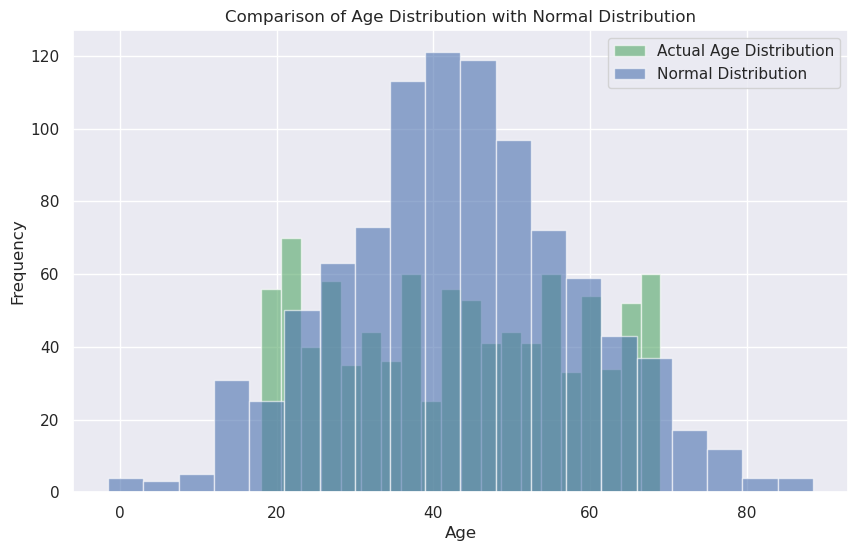

In [88]:
mean_age = df['Âge'].mean()
std_age = df['Âge'].std()

# Generate a normal distribution with the same mean and standard deviation
normal_dist = np.random.normal(mean_age, std_age, len(df['Âge']))

# Plot the histogram of the actual age data
plt.figure(figsize=(10, 6))
plt.hist(df['Âge'], bins=20, alpha=0.6, color='g', label='Actual Age Distribution')

# Plot the histogram of the generated normal distribution
plt.hist(normal_dist, bins=20, alpha=0.6, color='b', label='Normal Distribution')

plt.title('Comparison of Age Distribution with Normal Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Non, la distribution des âges ne suit une loi normale

23. Créer une colonne ‘prime’ : si la performance est ≥ 4 et l’ancienneté ≥ 5 ans → 1000, sinon
0 (avec NumPy).

In [89]:
df['Prime'] = np.where((df['Performance (Note)'] >= 4) & (df['Ancienneté (années)'] >= 5), 1000, 0)
df['Prime'].value_counts()

Prime
0       763
1000    189
Name: count, dtype: int64

24. Encoder la colonne ‘Sexe’ en valeurs numériques (0 pour Femme, 1 pour Homme)

In [90]:
le = LabelEncoder()
df['Sexe'] = le.fit_transform(df['Sexe'])

df.sample(10)

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note),Télétravail (%) (1),Télétravail (%) (2),Télétravail (%) (3),Ancienneté (années),Email valide,Prime
68,69,Johnston,Johnny,60,0,michelleortiz@vincent.com,Tajikistan,New Jeffery,53560.0,2018-05-13,Informatique,40.0,4.0,40.0,40.0,40.0,6.90,True,1000
656,657,Smith,Jeffrey,28,0,phillipsamber@yahoo.com,Russian Federation,Haroldside,117781.0,2020-09-12,Marketing,40.0,5.0,40.0,40.0,40.0,4.56,True,0
676,677,Jackson,Karen,69,0,christopher90@gmail.com,Costa Rica,Robertborough,91786.0,2023-02-07,Informatique,20.0,3.0,20.0,20.0,20.0,2.16,True,0
733,734,Garcia,Elizabeth,58,1,michelle47@patterson.net,Lebanon,East Cynthia,57492.0,2020-09-25,RH,0.0,3.0,0.0,0.0,0.0,4.53,True,0
329,330,Rhodes,Evelyn,25,1,lisa89@ross.com,Singapore,Ryanland,86990.0,2024-09-23,Finance,80.0,2.0,80.0,80.0,80.0,0.53,True,0
312,313,Stone,Wendy,38,1,gregory51@dean.com,Tuvalu,West Anthonyhaven,86977.0,2020-11-29,RH,60.0,2.0,60.0,60.0,60.0,4.35,True,0
977,978,Maldonado,Glenn,48,0,westfrank@hanson.com,Vanuatu,Yangstad,30387.0,2017-10-08,Informatique,0.0,3.0,0.0,0.0,0.0,7.49,True,0
698,699,Lopez,Tara,55,1,deanna54@gmail.com,Svalbard & Jan Mayen Islands,Rodriguezmouth,93802.0,2021-07-30,Finance,40.0,2.0,40.0,40.0,40.0,3.68,True,0
707,708,Rich,Tammy,30,1,rhonda30@gmail.com,Ireland,New Amandaberg,69897.0,2024-06-19,Informatique,20.0,5.0,20.0,20.0,20.0,0.79,True,0
965,966,Clark,Jessica,40,0,christopher02@patterson.com,Marshall Islands,West Madison,77805.0,2018-06-17,Finance,80.0,5.0,80.0,80.0,80.0,6.80,True,1000


25. Utilisez pd.cut() pour créer une nouvelle colonne ‘Tranche d’âge’ avec les intervalles suivants : 0-25, 26-30, 31-40.

In [91]:
bins = [0, 25, 30, 40]
labels = ['Ado', 'Jeune', 'Vieux']

df['Tranche d’âge'] = pd.cut(df['Âge'], bins=bins, labels=labels, right=True)

print(df[['Âge', 'Tranche d’âge']].head())

   Âge Tranche d’âge
0   62           NaN
1   65           NaN
2   18           Ado
3   21           Ado
4   21           Ado


26. Ajoutez une colonne de langages (listes) fictive à 4 lignes et utilisez ‘explode()’ pour séparer chaque ligne par langage.

In [92]:
# df.loc[df.index[:4], 'Langages'] = [['Python', 'Java'], ['C++', 'JavaScript'], ['Ruby', 'Go'], ['Swift', 'Kotlin']]
#
# df_exploded =aggregating df.explode('Langages')
#
# print(df_exploded[['Langages']].head(10))

27. Transformez votre DataFrame avec un MultiIndex sur ‘Département’ et ‘Sexe’, puis utilisez ‘stack()’ et ‘unstack()’ pour observer la structure.

In [93]:
# Check for duplicate entries in the combination of 'Département' and 'Sexe'
duplicates = df[df.duplicated(subset=['Département', 'Sexe'], keep=False)]


# Remove duplicates
df_unique = df.drop_duplicates(subset=['Département', 'Sexe'])

df_multi = df_unique.set_index(['Département', 'Sexe'])

df_stacked = df_multi.stack()

df_unstacked = df_stacked.unstack()

# Display the resulting DataFrames
print("DataFrame with MultiIndex:")
print(df_multi.head())

print("\nDataFrame after stacking:")
print(df_stacked.head())

print("\nDataFrame after unstacking:")
print(df_unstacked.head())

DataFrame with MultiIndex:
                   ID       Nom     Prénom  Âge                     Email  \
Département  Sexe                                                           
Finance      1      1   Richard     Stacey   62    lgonzalez@crawford.org   
Informatique 1      2     Chang    Loretta   65  rebeccabrown@hotmail.com   
RH           1      4     Green      Julie   21   morgandevon@burgess.com   
             0      6  Sullivan        Ana   57     afranklin@hotmail.com   
Logistique   1      8    Turner  Stephanie   37       uphillips@cohen.com   

                                  Pays           Ville  Salaire (€)  \
Département  Sexe                                                     
Finance      1     Trinidad And Tobago   New Devinview      54564.0   
Informatique 1             Netherlands    Lake Rebecca      23393.0   
RH           1                 Moldova  Alexanderville      52274.0   
             0                 Iceland  South Benjamin      33920.0   
Logisti

28. Détectez les outliers dans la colonne ‘Salaire’ avec la méthode de l’IQR, et créez un DataFrame les contenant.

In [94]:
Q1 = df['Salaire (€)'].quantile(0.25)
Q3 = df['Salaire (€)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df[(df['Salaire (€)'] < lower_bound) | (df['Salaire (€)'] > upper_bound)]

outliers_df

,ID,Nom,Prénom,Âge,Sexe,Email,Pays,Ville,Salaire (€),Date d'embauche,Département,Télétravail (%),Performance (Note),Télétravail (%) (1),Télétravail (%) (2),Télétravail (%) (3),Ancienneté (années),Email valide,Prime,Tranche d’âge


29. Encodez la colonne ‘Département’ avec ‘get_dummies()’ pour préparer les données à une analyse automatique.

In [95]:
df_dummies = pd.get_dummies(df, columns=['Département'])

print(df_dummies.head())

   ID      Nom    Prénom  Âge  Sexe                         Email  \
0   1  Richard    Stacey   62     1        lgonzalez@crawford.org   
1   2    Chang   Loretta   65     1      rebeccabrown@hotmail.com   
2   3   Fisher  Kimberly   18     1  waynebarnes@schultz-sims.org   
3   4    Green     Julie   21     1       morgandevon@burgess.com   
4   5    Dixon     Jacob   21     1          elliskaren@gmail.com   

                  Pays           Ville  Salaire (€) Date d'embauche  ...  \
0  Trinidad And Tobago   New Devinview      54564.0      2023-09-30  ...   
1          Netherlands    Lake Rebecca      23393.0      2023-10-14  ...   
2                 Oman   Alexanderfort      62711.0      2017-08-24  ...   
3              Moldova  Alexanderville      52274.0      2022-06-09  ...   
4   Dominican Republic     East Darren     108305.0      2018-08-02  ...   

   Ancienneté (années)  Email valide  Prime  Tranche d’âge  \
0                 1.51          True      0            NaN   
1   

30. Ajoutez une colonne de date fictive (date d’inscription) et utilisez ‘.dt.year’ et ‘.dt.month’ pour extraire les informations temporelles.

In [ ]:
df['Date d’inscription'] = pd.date_range(start='2020-01-01', periods=len(df), freq='ME')

df['Année d’inscription'] = df['Date d’inscription'].dt.year
df['Mois d’inscription'] = df['Date d’inscription'].dt.month

print(df[['Date d’inscription', 'Année d’inscription', 'Mois d’inscription']].head())

32. Utilisez Seaborn pour afficher un ‘barplot’ de l’âge moyen par département.

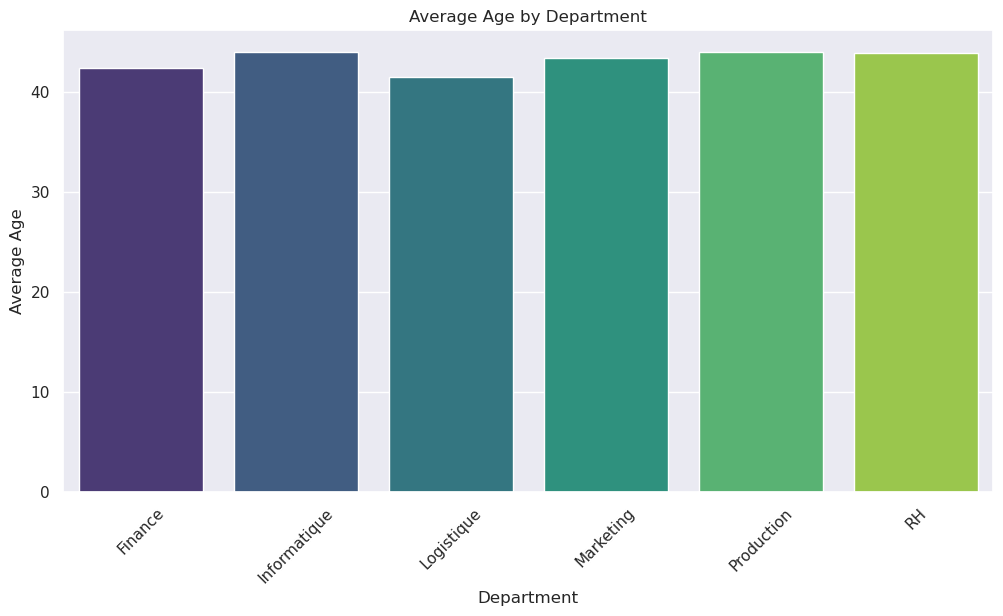

In [51]:
age_mean_by_dept = df.groupby('Département')['Âge'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Département', y='Âge', hue='Département', data=age_mean_by_dept, palette='viridis', dodge=False, legend=False)
plt.title('Average Age by Department')
plt.xlabel('Department')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

33. Sauvegarder le DataFrame nettoyé dans un nouveau fichier Excel nommé ‘employes_nettoyé.xlsx’.

In [52]:
df.to_excel('./data/employes_nettoyé.xlsx', index=False)

34. Créer un histogramme de la répartition des âges.

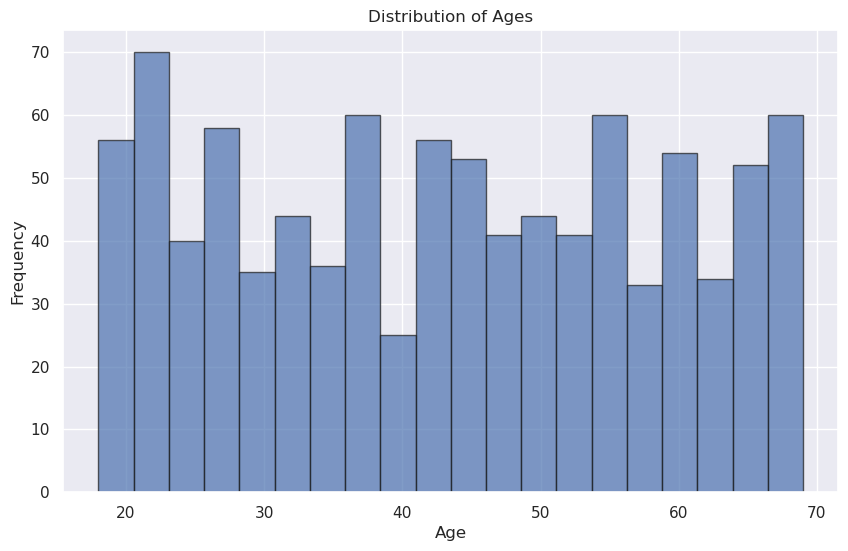

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(df['Âge'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

35. Créer un graphique à barres montrant le nombre d’employés par département.

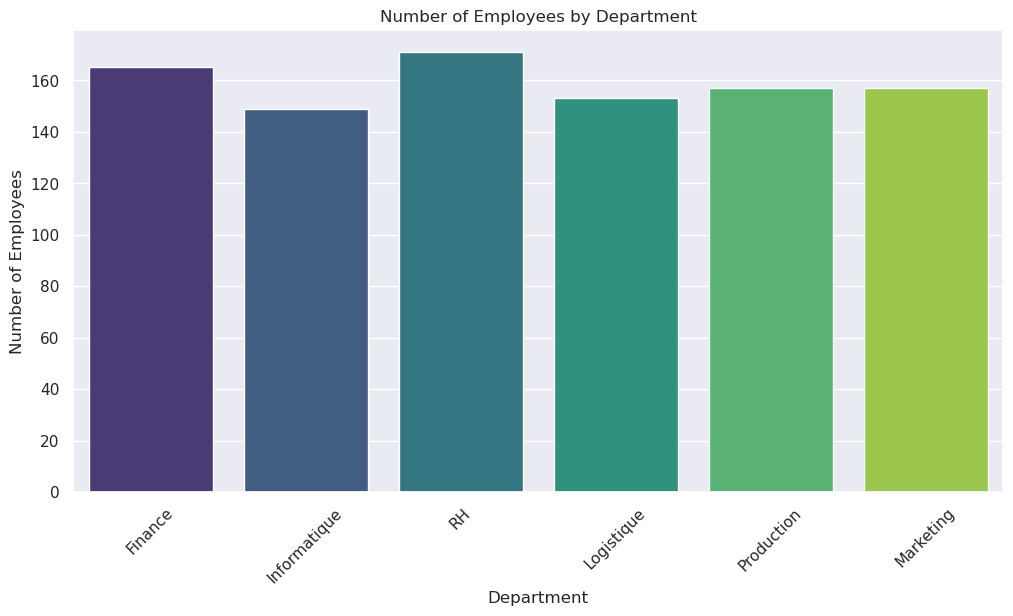

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Département', hue='Département', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

36. Créer un camembert (pie chart) montrant la répartition hommes/femmes.

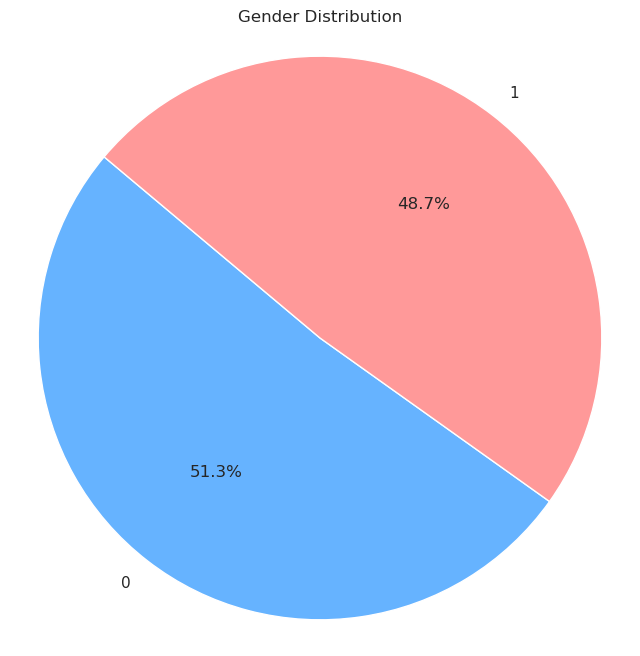

In [55]:
# Count the number of men and women
gender_counts = df['Sexe'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

37. Créer un boxplot des salaires par département.

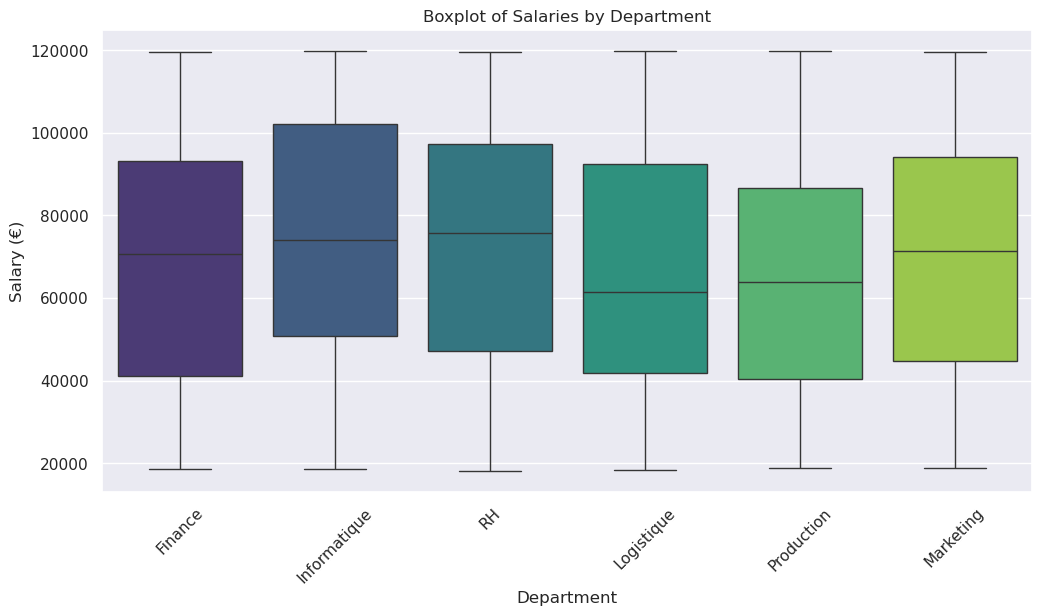

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Département', y='Salaire (€)', hue='Département', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Boxplot of Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Salary (€)')
plt.xticks(rotation=45)
plt.show()

38. Générer une heatmap de corrélation entre les colonnes numériques (âge, salaire, performance, télétravail, ancienneté).

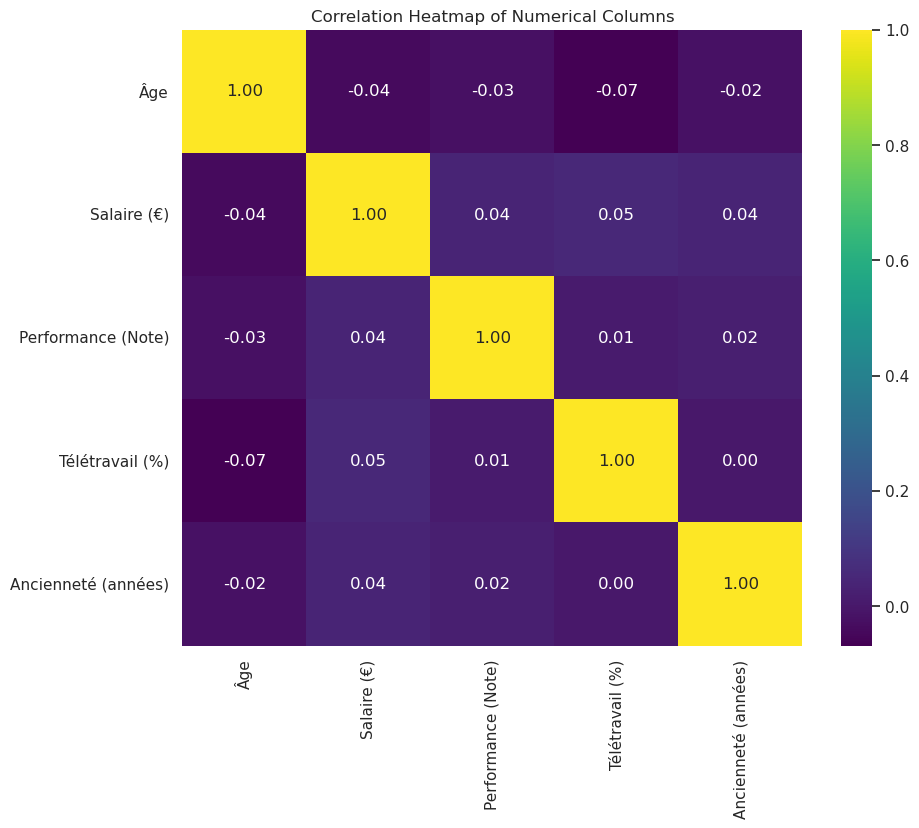

In [57]:
numerical_columns = ['Âge', 'Salaire (€)', 'Performance (Note)', 'Télétravail (%)', 'Ancienneté (années)']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

39. Tracer une courbe de l’évolution des embauches par année.

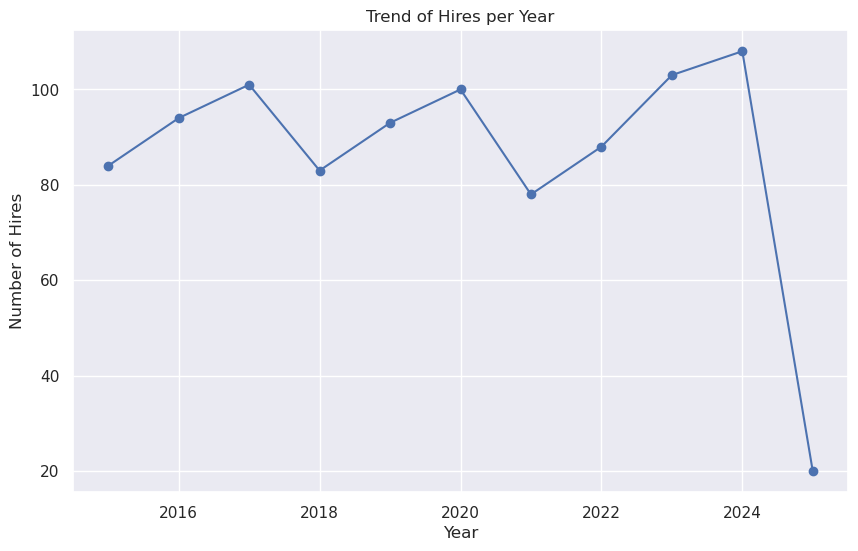

In [58]:
df['Année d\'embauche'] = df['Date d\'embauche'].dt.year

hires_per_year = df['Année d\'embauche'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hires_per_year.index, hires_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Hires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.grid(True)
plt.show()

40. Créer un graphique combiné (barres + ligne) montrant le salaire moyen et la performance moyenne par département.

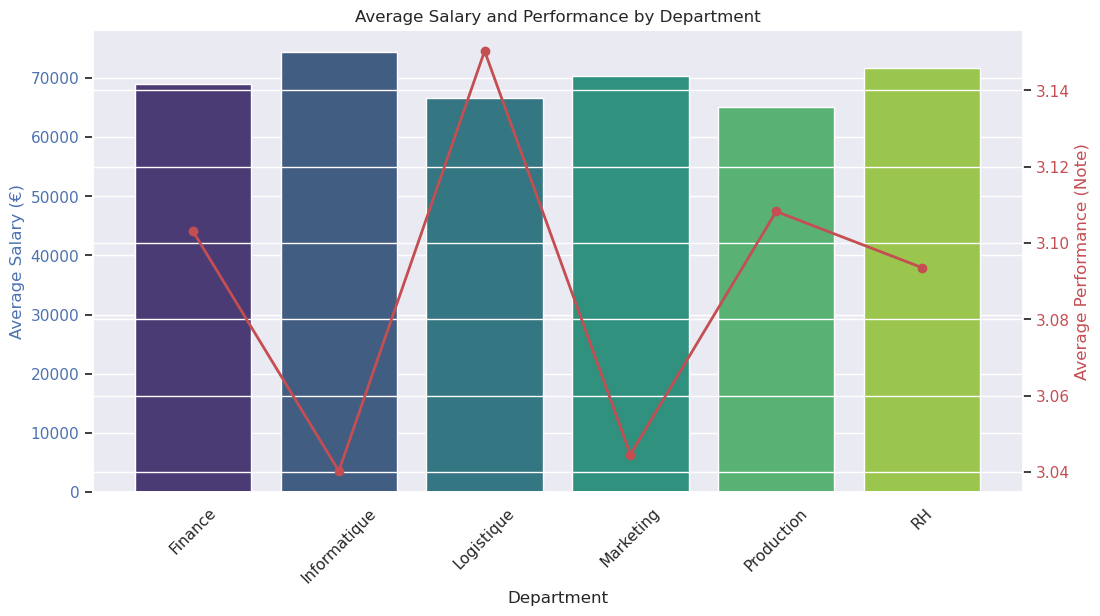

In [59]:
# Calculate the average salary and performance by department
avg_salary_per_dept = df.groupby('Département')['Salaire (€)'].mean().reset_index()
avg_performance_per_dept = df.groupby('Département')['Performance (Note)'].mean().reset_index()

combined_df = pd.merge(avg_salary_per_dept, avg_performance_per_dept, on='Département')

# Create a combined bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average salary as bars
sns.barplot(x='Département', y='Salaire (€)', hue='Département', data=combined_df, palette='viridis', dodge=False, ax=ax1, legend=False)
ax1.set_xlabel('Department')
ax1.set_ylabel('Average Salary (€)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for the average performance
ax2 = ax1.twinx()
ax2.plot(combined_df['Département'], combined_df['Performance (Note)'], color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Average Performance (Note)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Average Salary and Performance by Department')
plt.show()

41. Visualiser la distribution des salaires avec un KDE plot (seaborn).

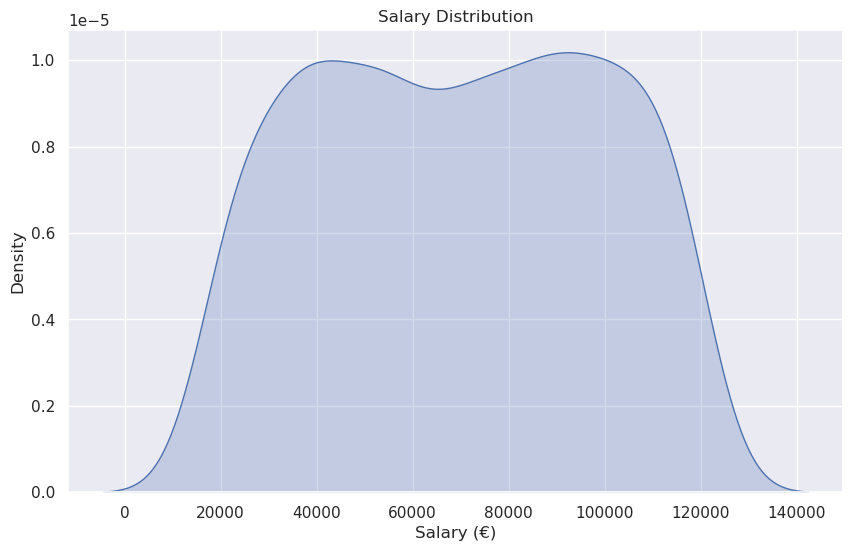

In [60]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Salaire (€)'], fill=True, color='b')
plt.title('Salary Distribution')
plt.xlabel('Salary (€)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

42. Tracer une carte thermique du nombre d’employés par pays et par sexe (tableau croisé sous forme de heatmap).

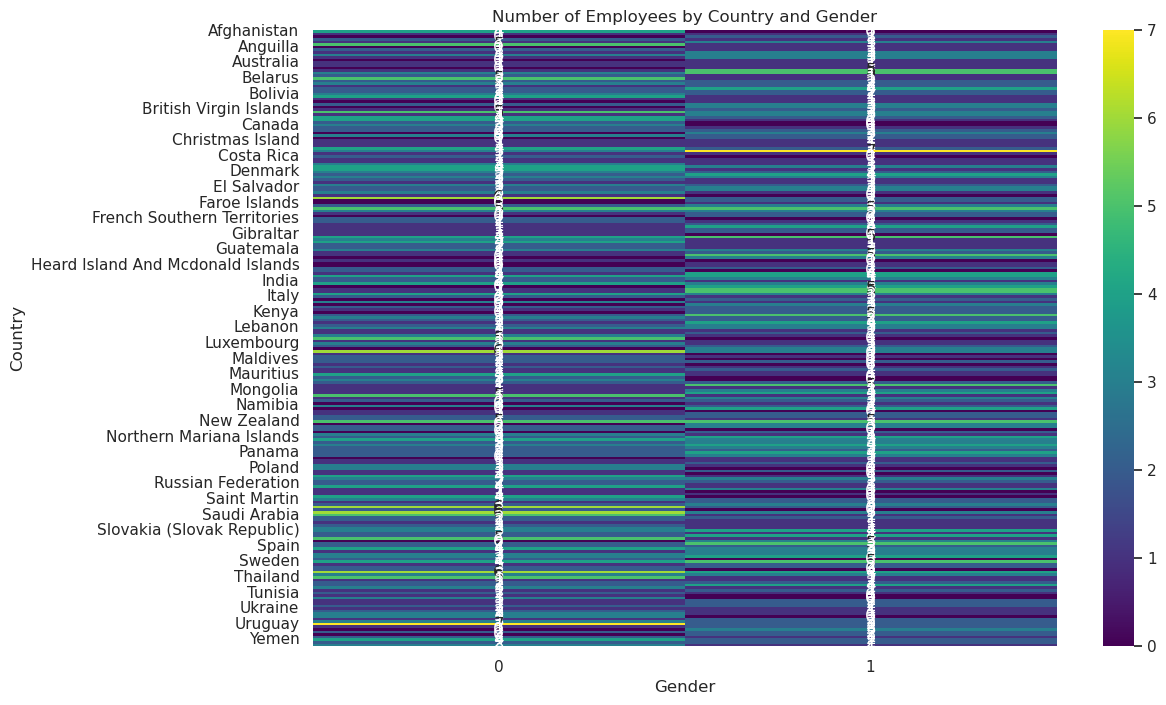

In [61]:
# Create a pivot table with the number of employees by country and gender
pivot_table = df.pivot_table(index='Pays', columns='Sexe', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis')
plt.title('Number of Employees by Country and Gender')
plt.xlabel('Gender')
plt.ylabel('Country')
plt.show()

43. Générer un scatter plot entre l’âge et le salaire, en coloriant par note de performance.

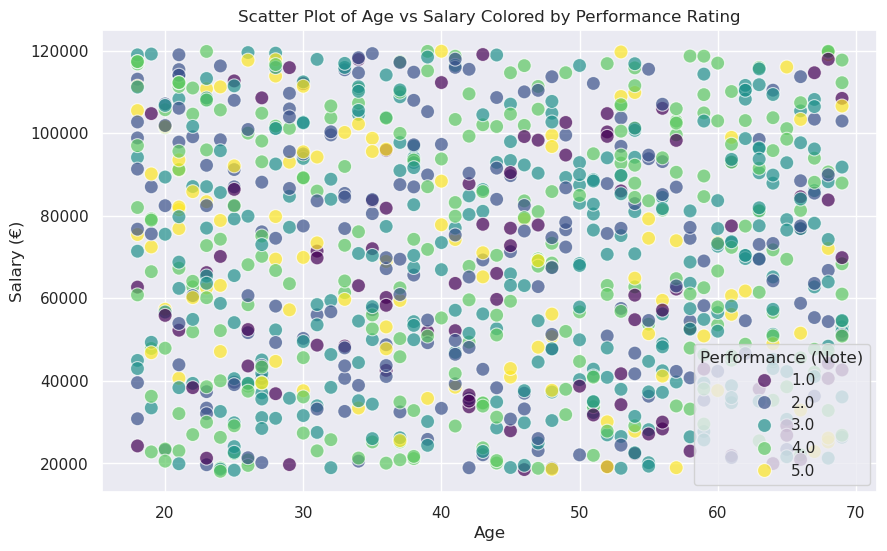

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Âge', y='Salaire (€)', hue='Performance (Note)', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Scatter Plot of Age vs Salary Colored by Performance Rating')
plt.xlabel('Age')
plt.ylabel('Salary (€)')
plt.grid(True)
plt.show()